In [6]:
#Importing Essential Packages, Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from scipy import stats


In [7]:
#Converting the CSV file into DataFrame
df = pd.read_csv("data1.csv")
df


,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000.0,01-06-2012 00:00,present,senior quality engineer,Bangalore,f,19-02-1990 00:00,84.30,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000.0,01-09-2013 00:00,present,assistant manager,Indore,m,04-10-1989 00:00,85.40,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000.0,01-06-2014 00:00,present,systems engineer,Chennai,f,03-08-1992 00:00,85.00,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000.0,01-07-2011 00:00,present,senior software engineer,Gurgaon,m,05-12-1989 00:00,85.60,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000.0,01-03-2014 00:00,01-03-2015 00:00,get,Manesar,m,27-02-1991 00:00,78.00,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,train,47916,280000.0,01-10-2011 00:00,01-10-2012 00:00,software engineer,New Delhi,m,15-04-1987 00:00,52.09,...,-1,-1,-1,-1,-1,-0.1082,0.3448,0.2366,0.64980,-0.9194
3994,train,752781,100000.0,01-07-2013 00:00,01-07-2013 00:00,technical writer,Hyderabad,f,27-08-1992 00:00,90.00,...,-1,-1,-1,-1,-1,-0.3027,0.8784,0.9322,0.77980,-0.0943
3995,train,355888,320000.0,01-07-2013 00:00,present,associate software engineer,Bangalore,m,03-07-1991 00:00,81.86,...,-1,-1,-1,-1,-1,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615
3996,train,947111,200000.0,01-07-2014 00:00,01-01-2015 00:00,software developer,Asifabadbanglore,f,20-03-1992 00:00,78.72,...,438,-1,-1,-1,-1,-0.1590,0.0459,-0.4511,-0.36120,-0.0943


In [8]:
#Getting information about Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             3998 non-null   object 
 1   ID                     3998 non-null   int64  
 2   Salary                 3998 non-null   float64
 3   DOJ                    3998 non-null   object 
 4   DOL                    3998 non-null   object 
 5   Designation            3998 non-null   object 
 6   JobCity                3998 non-null   object 
 7   Gender                 3998 non-null   object 
 8   DOB                    3998 non-null   object 
 9   10percentage           3998 non-null   float64
 10  10board                3998 non-null   object 
 11  12graduation           3998 non-null   int64  
 12  12percentage           3998 non-null   float64
 13  12board                3998 non-null   object 
 14  CollegeID              3998 non-null   int64  
 15  Coll

In [9]:
#Dropping Column 'Unnamed' which is not useful for the analysis
df= df.drop('Unnamed: 0', axis=1)

In [10]:
df

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000.0,01-06-2012 00:00,present,senior quality engineer,Bangalore,f,19-02-1990 00:00,84.30,"board ofsecondary education,ap",...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,579905,500000.0,01-09-2013 00:00,present,assistant manager,Indore,m,04-10-1989 00:00,85.40,cbse,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,810601,325000.0,01-06-2014 00:00,present,systems engineer,Chennai,f,03-08-1992 00:00,85.00,cbse,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,267447,1100000.0,01-07-2011 00:00,present,senior software engineer,Gurgaon,m,05-12-1989 00:00,85.60,cbse,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,343523,200000.0,01-03-2014 00:00,01-03-2015 00:00,get,Manesar,m,27-02-1991 00:00,78.00,cbse,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,47916,280000.0,01-10-2011 00:00,01-10-2012 00:00,software engineer,New Delhi,m,15-04-1987 00:00,52.09,cbse,...,-1,-1,-1,-1,-1,-0.1082,0.3448,0.2366,0.64980,-0.9194
3994,752781,100000.0,01-07-2013 00:00,01-07-2013 00:00,technical writer,Hyderabad,f,27-08-1992 00:00,90.00,state board,...,-1,-1,-1,-1,-1,-0.3027,0.8784,0.9322,0.77980,-0.0943
3995,355888,320000.0,01-07-2013 00:00,present,associate software engineer,Bangalore,m,03-07-1991 00:00,81.86,"bse,odisha",...,-1,-1,-1,-1,-1,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615
3996,947111,200000.0,01-07-2014 00:00,01-01-2015 00:00,software developer,Asifabadbanglore,f,20-03-1992 00:00,78.72,state board,...,438,-1,-1,-1,-1,-0.1590,0.0459,-0.4511,-0.36120,-0.0943


In [11]:
#Getting column names from dataframe
df.columns

Index(['ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity', 'Gender', 'DOB',
       '10percentage', '10board', '12graduation', '12percentage', '12board',
       'CollegeID', 'CollegeTier', 'Degree', 'Specialization', 'collegeGPA',
       'CollegeCityID', 'CollegeCityTier', 'CollegeState', 'GraduationYear',
       'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience'],
      dtype='object')

In [12]:
#Converting all column names into lower cases.
df.columns = df.columns.str.lower()


In [13]:
df.columns

Index(['id', 'salary', 'doj', 'dol', 'designation', 'jobcity', 'gender', 'dob',
       '10percentage', '10board', '12graduation', '12percentage', '12board',
       'collegeid', 'collegetier', 'degree', 'specialization', 'collegegpa',
       'collegecityid', 'collegecitytier', 'collegestate', 'graduationyear',
       'english', 'logical', 'quant', 'domain', 'computerprogramming',
       'electronicsandsemicon', 'computerscience', 'mechanicalengg',
       'electricalengg', 'telecomengg', 'civilengg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience'],
      dtype='object')

In [14]:
df.head()


,id,salary,doj,dol,designation,jobcity,gender,dob,10percentage,10board,...,computerscience,mechanicalengg,electricalengg,telecomengg,civilengg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000.0,01-06-2012 00:00,present,senior quality engineer,Bangalore,f,19-02-1990 00:00,84.3,"board ofsecondary education,ap",...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,579905,500000.0,01-09-2013 00:00,present,assistant manager,Indore,m,04-10-1989 00:00,85.4,cbse,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,810601,325000.0,01-06-2014 00:00,present,systems engineer,Chennai,f,03-08-1992 00:00,85.0,cbse,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,267447,1100000.0,01-07-2011 00:00,present,senior software engineer,Gurgaon,m,05-12-1989 00:00,85.6,cbse,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,343523,200000.0,01-03-2014 00:00,01-03-2015 00:00,get,Manesar,m,27-02-1991 00:00,78.0,cbse,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [15]:
df.describe()

,id,salary,10percentage,12graduation,12percentage,collegeid,collegetier,collegegpa,collegecityid,collegecitytier,...,computerscience,mechanicalengg,electricalengg,telecomengg,civilengg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
count,3.998000e+03,3.998000e+03,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,...,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,6.637945e+05,3.076998e+05,77.925443,2008.087544,74.466366,5156.851426,1.925713,71.486171,5156.851426,0.300400,...,90.742371,22.974737,16.478739,31.851176,2.683842,-0.037831,0.146496,0.002763,-0.169033,-0.138110
std,3.632182e+05,2.127375e+05,9.850162,1.653599,10.999933,4802.261482,0.262270,8.167338,4802.261482,0.458489,...,175.273083,98.123311,87.585634,104.852845,36.658505,1.028666,0.941782,0.951471,1.007580,1.008075
min,1.124400e+04,3.500000e+04,43.000000,1995.000000,40.000000,2.000000,1.000000,6.450000,2.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-4.126700,-5.781600,-4.600900,-2.643000,-7.375700
25%,3.342842e+05,1.800000e+05,71.680000,2007.000000,66.000000,494.000000,2.000000,66.407500,494.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.713525,-0.287100,-0.604800,-0.868200,-0.669200
50%,6.396000e+05,3.000000e+05,79.150000,2008.000000,74.400000,3879.000000,2.000000,71.720000,3879.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.046400,0.212400,0.091400,-0.234400,-0.094300
75%,9.904800e+05,3.700000e+05,85.670000,2009.000000,82.600000,8818.000000,2.000000,76.327500,8818.000000,1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.702700,0.812800,0.672000,0.526200,0.502400
max,1.298275e+06,4.000000e+06,97.760000,2013.000000,98.700000,18409.000000,2.000000,99.930000,18409.000000,1.000000,...,715.000000,623.000000,676.000000,548.000000,516.000000,1.995300,1.904800,2.535400,3.352500,1.822400


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     3998 non-null   int64  
 1   salary                 3998 non-null   float64
 2   doj                    3998 non-null   object 
 3   dol                    3998 non-null   object 
 4   designation            3998 non-null   object 
 5   jobcity                3998 non-null   object 
 6   gender                 3998 non-null   object 
 7   dob                    3998 non-null   object 
 8   10percentage           3998 non-null   float64
 9   10board                3998 non-null   object 
 10  12graduation           3998 non-null   int64  
 11  12percentage           3998 non-null   float64
 12  12board                3998 non-null   object 
 13  collegeid              3998 non-null   int64  
 14  collegetier            3998 non-null   int64  
 15  degr

In [17]:
# Converting the DOJ into Date type:
df['doj'] = pd.to_datetime(df['doj'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     3998 non-null   int64         
 1   salary                 3998 non-null   float64       
 2   doj                    3998 non-null   datetime64[ns]
 3   dol                    3998 non-null   object        
 4   designation            3998 non-null   object        
 5   jobcity                3998 non-null   object        
 6   gender                 3998 non-null   object        
 7   dob                    3998 non-null   object        
 8   10percentage           3998 non-null   float64       
 9   10board                3998 non-null   object        
 10  12graduation           3998 non-null   int64         
 11  12percentage           3998 non-null   float64       
 12  12board                3998 non-null   object        
 13  col

In [18]:
df.shape

(3998, 38)

In [19]:
unique_cities = df['jobcity'].unique()
unique_cities


array(['Bangalore', 'Indore', 'Chennai', 'Gurgaon', 'Manesar',
       'Hyderabad', 'Banglore', 'Noida', 'Kolkata', 'Pune', '-1',
       'mohali', 'Jhansi', 'Delhi', 'Hyderabad ', 'Bangalore ', 'noida',
       'delhi', 'Bhubaneswar', 'Navi Mumbai', 'Mumbai', 'New Delhi',
       'Mangalore', 'Rewari', 'Gaziabaad', 'Bhiwadi', 'Mysore', 'Rajkot',
       'Greater Noida', 'Jaipur', 'noida ', 'HYDERABAD', 'mysore',
       'THANE', 'Maharajganj', 'Thiruvananthapuram', 'Punchkula',
       'Bhubaneshwar', 'Pune ', 'coimbatore', 'Dhanbad', 'Lucknow',
       'Trivandrum', 'kolkata', 'mumbai', 'Gandhi Nagar', 'Una',
       'Daman and Diu', 'chennai', 'GURGOAN', 'vsakhapttnam', 'pune',
       'Nagpur', 'Bhagalpur', 'new delhi - jaisalmer', 'Coimbatore',
       'Ahmedabad', 'Kochi/Cochin', 'Bankura', 'Bengaluru', 'Mysore ',
       'Kanpur ', 'jaipur', 'Gurgaon ', 'bangalore', 'CHENNAI',
       'Vijayawada', 'Kochi', 'Beawar', 'Alwar', 'NOIDA', 'Greater noida',
       'Siliguri ', 'raipur', 'gurgaon',

In [20]:
df.jobcity = df.jobcity.str.strip().str.lower()
unique_cities_cleaned = df['jobcity'].unique()
print(unique_cities_cleaned)


['bangalore' 'indore' 'chennai' 'gurgaon' 'manesar' 'hyderabad' 'banglore'
 'noida' 'kolkata' 'pune' '-1' 'mohali' 'jhansi' 'delhi' 'bhubaneswar'
 'navi mumbai' 'mumbai' 'new delhi' 'mangalore' 'rewari' 'gaziabaad'
 'bhiwadi' 'mysore' 'rajkot' 'greater noida' 'jaipur' 'thane'
 'maharajganj' 'thiruvananthapuram' 'punchkula' 'bhubaneshwar'
 'coimbatore' 'dhanbad' 'lucknow' 'trivandrum' 'gandhi nagar' 'una'
 'daman and diu' 'gurgoan' 'vsakhapttnam' 'nagpur' 'bhagalpur'
 'new delhi - jaisalmer' 'ahmedabad' 'kochi/cochin' 'bankura' 'bengaluru'
 'kanpur' 'vijayawada' 'kochi' 'beawar' 'alwar' 'siliguri' 'raipur'
 'bhopal' 'faridabad' 'jodhpur' 'udaipur' 'muzaffarpur' 'kolkata`'
 'bulandshahar' 'haridwar' 'raigarh' 'visakhapatnam' 'jabalpur' 'unnao'
 'aurangabad' 'belgaum' 'dehradun' 'rudrapur' 'jamshedpur' 'vizag' 'nouda'
 'dharamshala' 'banagalore' 'hissar' 'ranchi' 'madurai' 'gurga'
 'chandigarh' 'australia' 'cheyyar' 'sonepat' 'ghaziabad' 'pantnagar'
 'jagdalpur' 'angul' 'baroda' 'ariyalur

In [21]:
city_mapping = {
'bangalore': 'bangalore',
'banglore': 'bangalore',
'banagalore': 'bangalore',
'bengaluru': 'bangalore',
'asifabadbanglore':'bangalore',
'indore': 'indore',
'chennai': 'chennai',
'gurgaon': 'gurgaon',
'gurgoan': 'gurgaon',
'gurga': 'gurgaon',
'manesar': 'manesar',
'hyderabad': 'hyderabad',
'hderabad': 'hyderabad',
'hyderabad(bhadurpally)': 'hyderabad',
'noida': 'noida',
'nouda': 'noida',
'kolkata': 'kolkata',
'kolkata`': 'kolkata',
'pune': 'pune',
'-1': 'unknown',
'mohali': 'mohali',
'jhansi': 'jhansi',
'delhi': 'delhi',
'new delhi': 'new delhi',
'bhubaneswar': 'bhubaneswar',
'bhubaneshwar': 'bhubaneswar',
'navi mumbai': 'navi mumbai',
'mumbai': 'mumbai',
'mangalore': 'mangalore',
'rewari': 'rewari',
'gaziabaad': 'ghaziabad',
'ghaziabad': 'ghaziabad',
'bhiwadi': 'bhiwadi',
'mysore': 'mysore',
'rajkot': 'rajkot',
'greater noida': 'greater Noida',
'jaipur': 'jaipur',
'thane': 'thane',
'maharajganj': 'maharajganj',
'thiruvananthapuram': 'Thiruvananthapuram',
'punchkula': 'Panchkula',
'coimbatore': 'Coimbatore',
'dhanbad': 'Dhanbad',
'lucknow': 'Lucknow',
'trivandrum': 'Thiruvananthapuram',
'gandhi nagar': 'Gandhinagar',
'una': 'Una',
'daman and diu': 'Daman and Diu',
'vsakhapttnam': 'Visakhapatnam',
'nagpur': 'Nagpur',
'bhagalpur': 'Bhagalpur',
'new delhi - jaisalmer': 'New Delhi',
'ahmedabad': 'Ahmedabad',
'kochi/cochin': 'Kochi',
'bankura': 'Bankura',
'kanpur': 'Kanpur',
'vijayawada': 'Vijayawada',
'kochi': 'Kochi',
'beawar': 'Beawar',
'alwar': 'Alwar',
'siliguri': 'Siliguri',
'raipur': 'Raipur',
'bhopal': 'Bhopal',
'faridabad': 'Faridabad',
'jodhpur': 'Jodhpur',
'udaipur': 'Udaipur',
'muzaffarpur': 'Muzaffarpur',
'bulandshahar': 'Bulandshahar',
'haridwar': 'Haridwar',
'raigarh': 'Raigarh',
'visakhapatnam': 'Visakhapatnam',
'jabalpur': 'Jabalpur',
'unnao': 'Unnao',
'aurangabad': 'Aurangabad',
'belgaum': 'Belgaum',
'dehradun': 'Dehradun',
'rudrapur': 'Rudrapur',
'jamshedpur': 'Jamshedpur',
'vizag': 'Visakhapatnam',
'nouda': 'Noida',
'dharamshala': 'Dharamshala',
'hissar': 'Hisar',
'ranchi': 'Ranchi',
'madurai': 'Madurai',
'chandigarh': 'Chandigarh',
'australia': 'Australia',
'cheyyar': 'Cheyyar',
'sonepat': 'Sonepat',
'pantnagar': 'Pantnagar',
'jagdalpur': 'Jagdalpur',
'angul': 'Angul',
'baroda': 'Vadodara',
'ariyalur': 'Ariyalur',
'jowai': 'Jowai',
'neemrana': 'Neemrana',
'tirupathi': 'Tirupati',
'bhubneshwar': 'Bhubaneswar',
'calicut': 'Kozhikode',
'gandhinagar': 'Gandhinagar',
'dubai': 'Dubai',
'ahmednagar': 'Ahmednagar',
'nashik': 'Nashik',
'bellary': 'Bellary',
'ludhiana': 'Ludhiana',
'muzaffarnagar': 'Muzaffarnagar',
'gagret': 'Gagret',
'indirapuram, ghaziabad': 'Ghaziabad',
'gwalior': 'Gwalior',
'chennai & mumbai': 'Chennai',
'rajasthan': 'Rajasthan',
'sonipat': 'Sonipat',
'bareli': 'Bareli',
'hospete': 'Hospete',
'miryalaguda': 'Miryalaguda',
'dharuhera': 'Dharuhera',
'meerut': 'Meerut',
'ganjam': 'Ganjam',
'hubli': 'Hubli',
'ncr': 'NCR',
'agra': 'Agra',
'trichy': 'Tiruchirappalli',
'kudankulam ,tarapur': 'Kudankulam',
'ongole': 'Ongole',
'sambalpur': 'Sambalpur',
'pondicherry': 'Puducherry',
'bundi': 'Bundi',
'sadulpur,rajgarh,distt-churu,rajasthan': 'Rajasthan',
'am': 'Am',
'bikaner': 'Bikaner',
'vadodara': 'Vadodara',
'india': 'India',
'asansol': 'Asansol',
'tirunelvelli': 'Tirunelveli',
'ernakulam': 'Ernakulam',
'bilaspur': 'Bilaspur',
'chandrapur': 'Chandrapur',
'nanded': 'Nanded',
'dharmapuri': 'Dharmapuri',
'vandavasi': 'Vandavasi',
'rohtak': 'Rohtak',
'patna': 'Patna',
'salem': 'Salem',
'nasikcity': 'Nashik',
'technopark, trivandrum': 'Trivandrum',
'bharuch': 'Bharuch',
'tornagallu': 'Tornagallu',
'jaspur': 'Jaspur',
'burdwan': 'Burdwan',
'shimla': 'Shimla',
'gajiabaad': 'Ghaziabad',
'jammu': 'Jammu',
'shahdol': 'Shahdol',
'muvattupuzha': 'Muvattupuzha',
'al jubail,saudi arabia': 'Al Jubail',
'kalmar, sweden': 'Kalmar',
'secunderabad': 'Secunderabad',
'a-64,sec-64,noida': 'Noida',
'ratnagiri': 'Ratnagiri',
'jhajjar': 'Jhajjar',
'gulbarga': 'Gulbarga',
'hyderabad(bhadurpally)': 'Hyderabad',
'nalagarh': 'Nalagarh',
'jeddah saudi arabia': 'Jeddah',
'chennai, bangalore': 'Chennai',
'jamnagar': 'Jamnagar',
'tirupati': 'Tirupati',
'gonda': 'Gonda',
'orissa': 'Odisha',
'kharagpur': 'Kharagpur',
'navi mumbai , hyderabad': 'Navi Mumbai',
'joshimath': 'Joshimath',
'bathinda': 'Bathinda',
'johannesburg': 'Johannesburg',
'kala amb': 'Kala Amb',
'karnal': 'Karnal',
'london': 'London',
'kota': 'Kota',
'dehraj': 'Dehradun',
'melbourne': 'Melbourne',
'moradabad': 'Moradabad',
'delhi-gurgaon': 'Delhi',
'ambala': 'Ambala',
'faridkot': 'Faridkot',
'rohtak, haryana': 'Rohtak',
'khammam': 'Khammam',
'khurda': 'Khurda',
'jhalawar': 'Jhalawar',
'kaithal': 'Kaithal',
'sonbhadra': 'Sonbhadra',
'fatehgarh sahib': 'Fatehgarh Sahib',
'kaithal-haryana': 'Kaithal',
'bhilwara': 'Bhilwara',
'coimbatore, tirupur': 'Coimbatore',
'sri ganganagar': 'Sri Ganganagar',
'manipal': 'Manipal',
'tirupathi': 'Tirupati',
'kharagpur, west bengal': 'Kharagpur',
'kolkata': 'Kolkata',
'trichy-tiruchirappalli': 'Tiruchirappalli',
}


In [22]:
df['jobcity'] = df['jobcity'].replace(city_mapping)


In [23]:
df['jobcity'] = df.jobcity.str.strip().str.lower()

In [24]:
df

,id,salary,doj,dol,designation,jobcity,gender,dob,10percentage,10board,...,computerscience,mechanicalengg,electricalengg,telecomengg,civilengg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000.0,2012-01-06,present,senior quality engineer,bangalore,f,19-02-1990 00:00,84.30,"board ofsecondary education,ap",...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,579905,500000.0,2013-01-09,present,assistant manager,indore,m,04-10-1989 00:00,85.40,cbse,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,810601,325000.0,2014-01-06,present,systems engineer,chennai,f,03-08-1992 00:00,85.00,cbse,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,267447,1100000.0,2011-01-07,present,senior software engineer,gurgaon,m,05-12-1989 00:00,85.60,cbse,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,343523,200000.0,2014-01-03,01-03-2015 00:00,get,manesar,m,27-02-1991 00:00,78.00,cbse,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,47916,280000.0,2011-01-10,01-10-2012 00:00,software engineer,new delhi,m,15-04-1987 00:00,52.09,cbse,...,-1,-1,-1,-1,-1,-0.1082,0.3448,0.2366,0.64980,-0.9194
3994,752781,100000.0,2013-01-07,01-07-2013 00:00,technical writer,hyderabad,f,27-08-1992 00:00,90.00,state board,...,-1,-1,-1,-1,-1,-0.3027,0.8784,0.9322,0.77980,-0.0943
3995,355888,320000.0,2013-01-07,present,associate software engineer,bangalore,m,03-07-1991 00:00,81.86,"bse,odisha",...,-1,-1,-1,-1,-1,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615
3996,947111,200000.0,2014-01-07,01-01-2015 00:00,software developer,bangalore,f,20-03-1992 00:00,78.72,state board,...,438,-1,-1,-1,-1,-0.1590,0.0459,-0.4511,-0.36120,-0.0943


In [25]:
# Replacing date values with "Left" in dol
df['dol'] = df['dol'].apply(lambda x: "Left" if x != "present" else x)


In [26]:
df['dol']

,dol
0,present
1,present
2,present
3,present
4,Left
...,...
3993,Left
3994,Left
3995,present
3996,Left


In [27]:
df['dol'].value_counts()


,count
dol,
Left,2123
present,1875


In [28]:
df.describe()

,id,salary,doj,10percentage,12graduation,12percentage,collegeid,collegetier,collegegpa,collegecityid,...,computerscience,mechanicalengg,electricalengg,telecomengg,civilengg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
count,3.998000e+03,3.998000e+03,3998,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,...,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,6.637945e+05,3.076998e+05,2013-01-20 10:11:35.147574016,77.925443,2008.087544,74.466366,5156.851426,1.925713,71.486171,5156.851426,...,90.742371,22.974737,16.478739,31.851176,2.683842,-0.037831,0.146496,0.002763,-0.169033,-0.138110
min,1.124400e+04,3.500000e+04,1991-01-06 00:00:00,43.000000,1995.000000,40.000000,2.000000,1.000000,6.450000,2.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-4.126700,-5.781600,-4.600900,-2.643000,-7.375700
25%,3.342842e+05,1.800000e+05,2012-01-10 00:00:00,71.680000,2007.000000,66.000000,494.000000,2.000000,66.407500,494.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.713525,-0.287100,-0.604800,-0.868200,-0.669200
50%,6.396000e+05,3.000000e+05,2013-01-11 00:00:00,79.150000,2008.000000,74.400000,3879.000000,2.000000,71.720000,3879.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.046400,0.212400,0.091400,-0.234400,-0.094300
75%,9.904800e+05,3.700000e+05,2014-01-07 00:00:00,85.670000,2009.000000,82.600000,8818.000000,2.000000,76.327500,8818.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.702700,0.812800,0.672000,0.526200,0.502400
max,1.298275e+06,4.000000e+06,2015-01-12 00:00:00,97.760000,2013.000000,98.700000,18409.000000,2.000000,99.930000,18409.000000,...,715.000000,623.000000,676.000000,548.000000,516.000000,1.995300,1.904800,2.535400,3.352500,1.822400
std,3.632182e+05,2.127375e+05,NaN,9.850162,1.653599,10.999933,4802.261482,0.262270,8.167338,4802.261482,...,175.273083,98.123311,87.585634,104.852845,36.658505,1.028666,0.941782,0.951471,1.007580,1.008075


In [29]:
df.salary.mean().round(2)


307699.85

In [30]:
df.gender.value_counts()

,count
gender,
m,3041
f,957


In [31]:
df.head()

,id,salary,doj,dol,designation,jobcity,gender,dob,10percentage,10board,...,computerscience,mechanicalengg,electricalengg,telecomengg,civilengg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000.0,2012-01-06,present,senior quality engineer,bangalore,f,19-02-1990 00:00,84.3,"board ofsecondary education,ap",...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,579905,500000.0,2013-01-09,present,assistant manager,indore,m,04-10-1989 00:00,85.4,cbse,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,810601,325000.0,2014-01-06,present,systems engineer,chennai,f,03-08-1992 00:00,85.0,cbse,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,267447,1100000.0,2011-01-07,present,senior software engineer,gurgaon,m,05-12-1989 00:00,85.6,cbse,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,343523,200000.0,2014-01-03,Left,get,manesar,m,27-02-1991 00:00,78.0,cbse,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [32]:
df.computerscience = df.computerscience.replace(-1,0)
df.mechanicalengg = df.mechanicalengg.replace(-1,0)
df.electricalengg = df.electricalengg.replace(-1,0)
df.telecomengg = df.telecomengg.replace(-1,0)
df.civilengg = df.civilengg.replace(-1,0)

In [33]:
df.head()


,id,salary,doj,dol,designation,jobcity,gender,dob,10percentage,10board,...,computerscience,mechanicalengg,electricalengg,telecomengg,civilengg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000.0,2012-01-06,present,senior quality engineer,bangalore,f,19-02-1990 00:00,84.3,"board ofsecondary education,ap",...,0,0,0,0,0,0.9737,0.8128,0.5269,1.35490,-0.4455
1,579905,500000.0,2013-01-09,present,assistant manager,indore,m,04-10-1989 00:00,85.4,cbse,...,0,0,0,0,0,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,810601,325000.0,2014-01-06,present,systems engineer,chennai,f,03-08-1992 00:00,85.0,cbse,...,0,0,0,0,0,0.2718,1.7109,0.1637,-0.86820,0.6721
3,267447,1100000.0,2011-01-07,present,senior software engineer,gurgaon,m,05-12-1989 00:00,85.6,cbse,...,0,0,0,0,0,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,343523,200000.0,2014-01-03,Left,get,manesar,m,27-02-1991 00:00,78.0,cbse,...,0,0,0,0,0,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [34]:
df['salary'].describe()

,salary
count,3.998000e+03
mean,3.076998e+05
std,2.127375e+05
min,3.500000e+04
25%,1.800000e+05
50%,3.000000e+05
75%,3.700000e+05
max,4.000000e+06


In [35]:
pd.options.display.float_format = '{:,.0f}'.format
# Display the describe() output for the 'salary' column
df.describe().transpose()

,count,mean,min,25%,50%,75%,max,std
id,"3,998","663,795","11,244","334,284","639,600","990,480","1,298,275","363,218"
salary,"3,998","307,700","35,000","180,000","300,000","370,000","4,000,000","212,737"
doj,3998,2013-01-20 10:11:35.147574016,1991-01-06 00:00:00,2012-01-10 00:00:00,2013-01-11 00:00:00,2014-01-07 00:00:00,2015-01-12 00:00:00,NaN
10percentage,"3,998",78,43,72,79,86,98,10
12graduation,"3,998","2,008","1,995","2,007","2,008","2,009","2,013",2
12percentage,"3,998",74,40,66,74,83,99,11
collegeid,"3,998","5,157",2,494,"3,879","8,818","18,409","4,802"
collegetier,"3,998",2,1,2,2,2,2,0
collegegpa,"3,998",71,6,66,72,76,100,8
collegecityid,"3,998","5,157",2,494,"3,879","8,818","18,409","4,802"


In [36]:
df.columns


Index(['id', 'salary', 'doj', 'dol', 'designation', 'jobcity', 'gender', 'dob',
       '10percentage', '10board', '12graduation', '12percentage', '12board',
       'collegeid', 'collegetier', 'degree', 'specialization', 'collegegpa',
       'collegecityid', 'collegecitytier', 'collegestate', 'graduationyear',
       'english', 'logical', 'quant', 'domain', 'computerprogramming',
       'electronicsandsemicon', 'computerscience', 'mechanicalengg',
       'electricalengg', 'telecomengg', 'civilengg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience'],
      dtype='object')

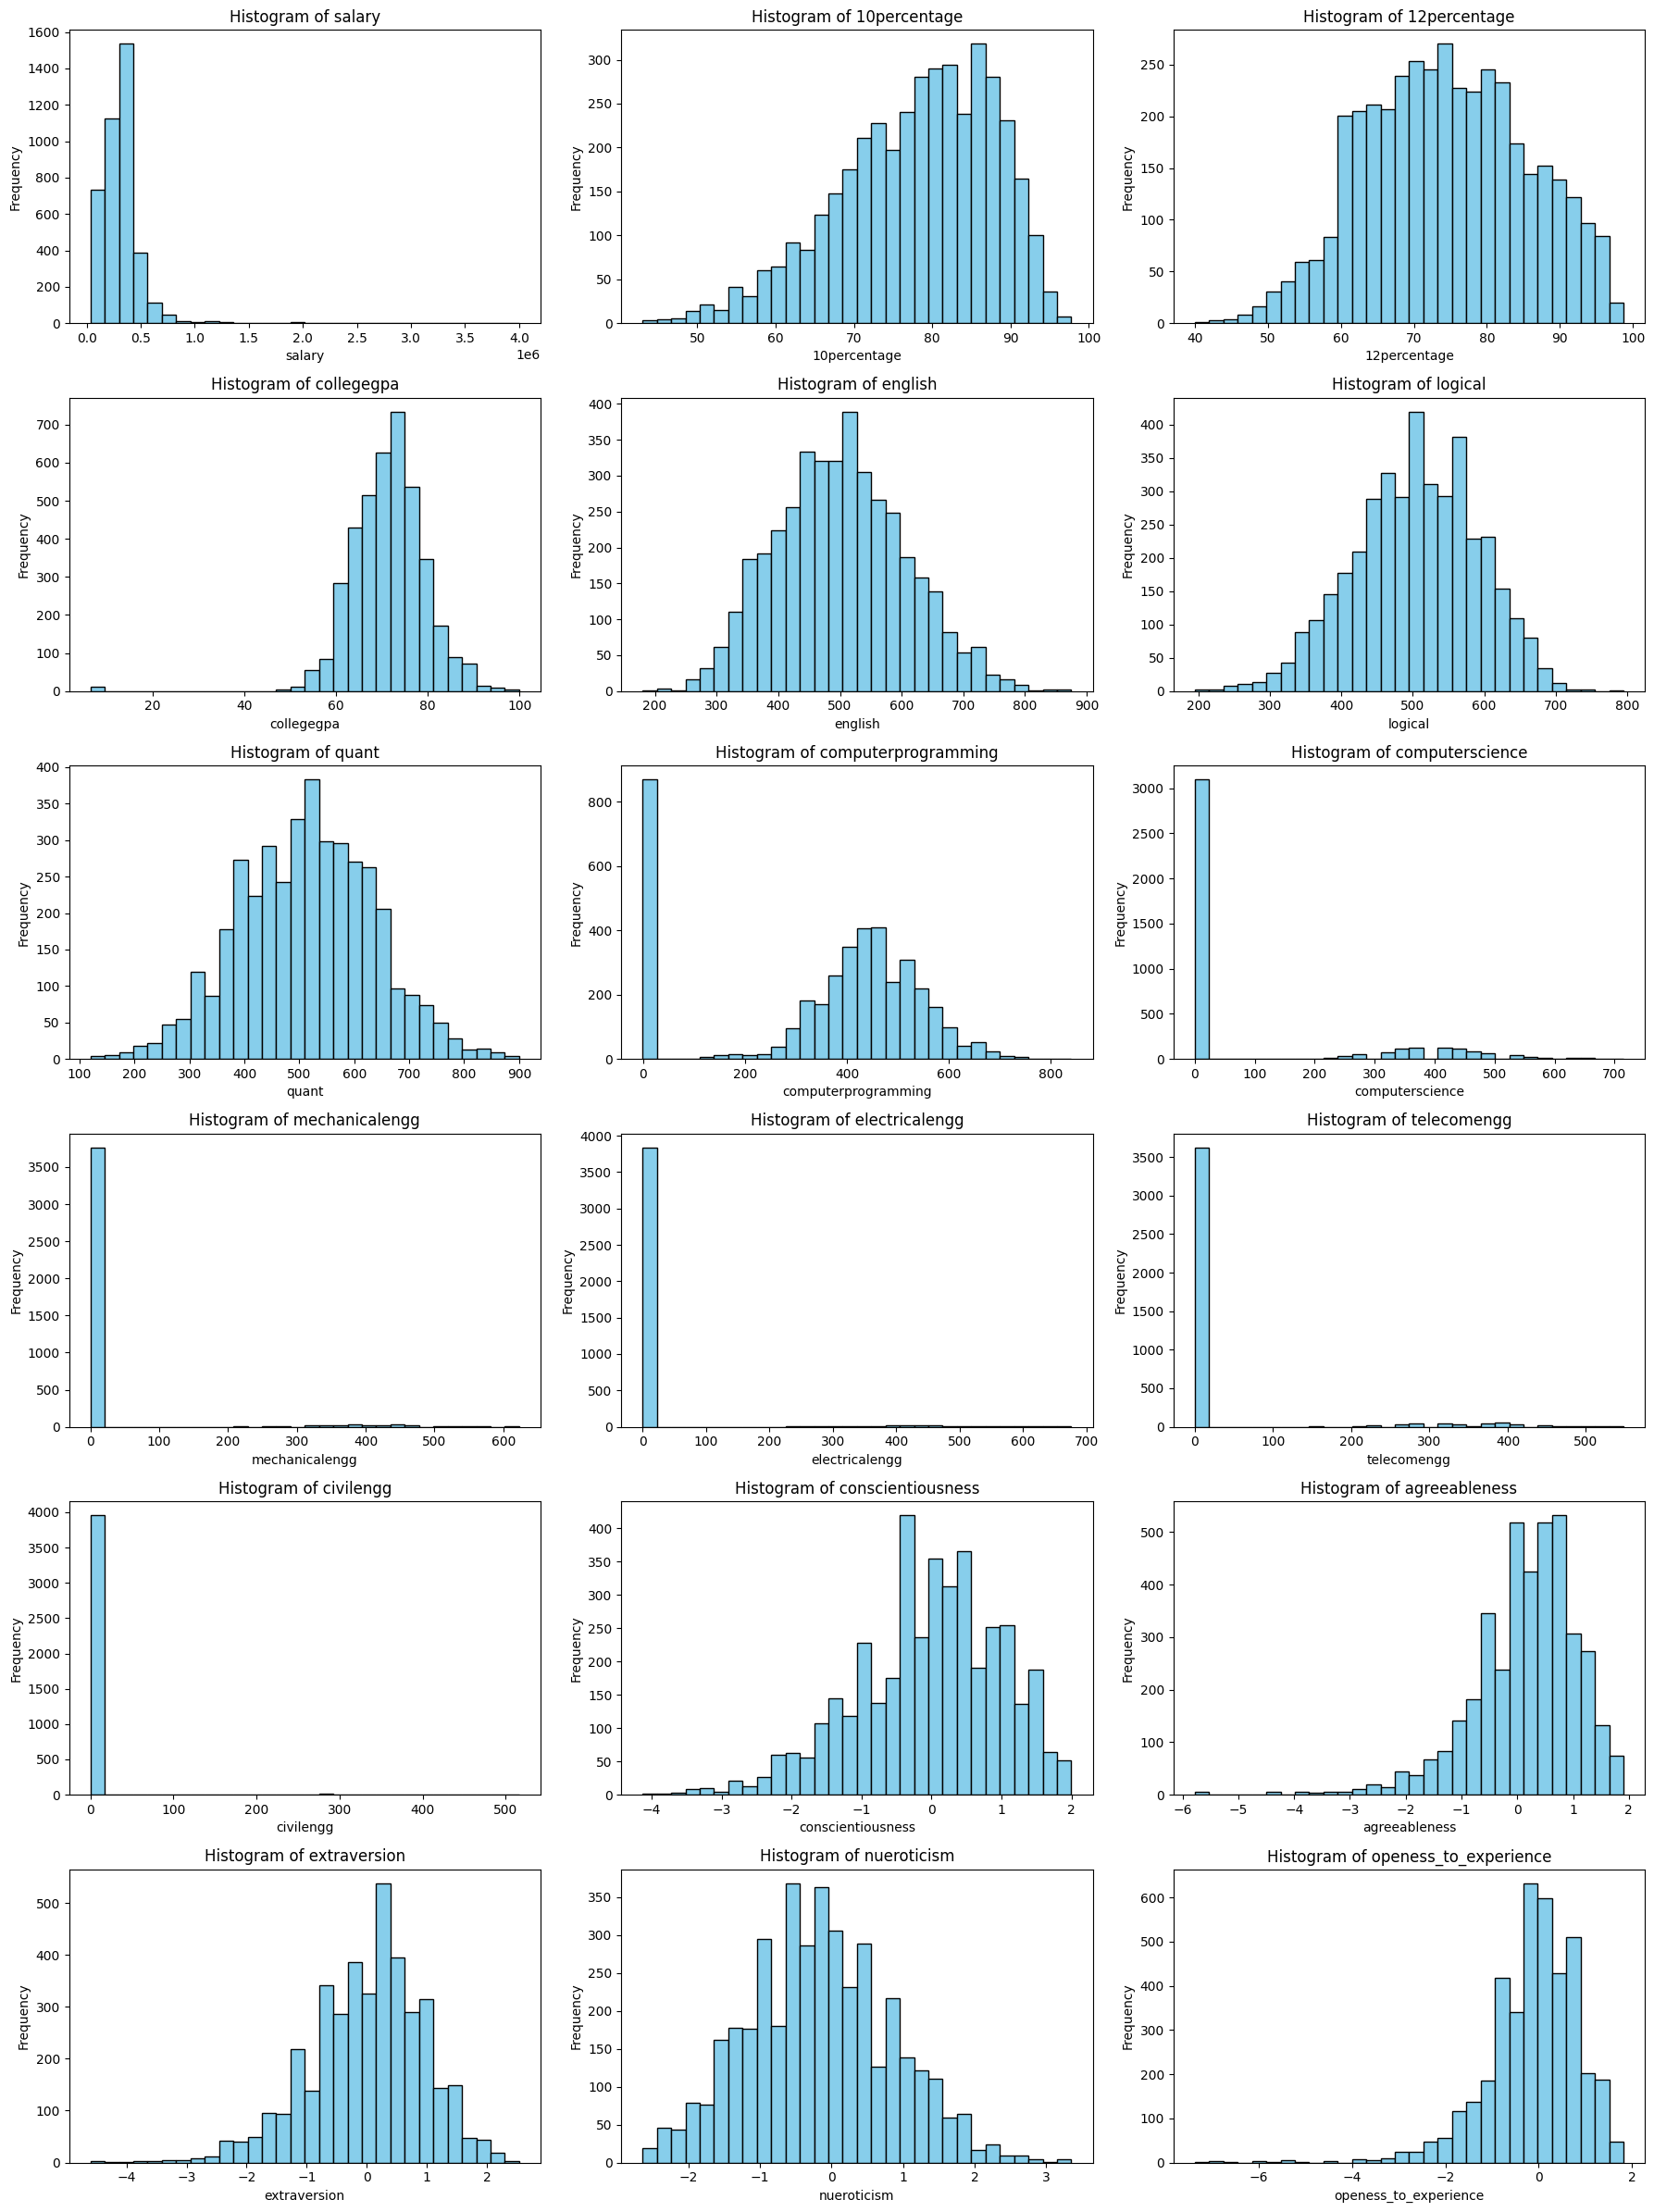

In [37]:
# Select the columns you want to plot
columns_to_plot = ['salary', '10percentage', '12percentage', 'collegegpa',
'english', 'logical',
'quant', 'computerprogramming', 'computerscience',
'mechanicalengg',
'electricalengg', 'telecomengg', 'civilengg',
'conscientiousness',
'agreeableness', 'extraversion', 'nueroticism',
'openess_to_experience']
# Set up the figure and axes for subplots
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(18, 24)) # 6 rows, 3 columns layout
axes = axes.flatten() # Flatten the 2D array of axes into 1D for easier iteration
# Loop through each column and its respective axis
for i, column in enumerate(columns_to_plot):
  axes[i].hist(df[column].dropna(), bins=30, color='skyblue',
               edgecolor='black') # Plot histogram
  axes[i].set_title(f'Histogram of {column}') # Set title for each subplot
  axes[i].set_xlabel(column) # X-axis label
  axes[i].set_ylabel('Frequency') # Y-axis label
# Remove any unused subplots (if there are more axes than columns)
for j in range(i+1, len(axes)):
  fig.delaxes(axes[j])
# Adjust layout to prevent overlapping
plt.tight_layout()


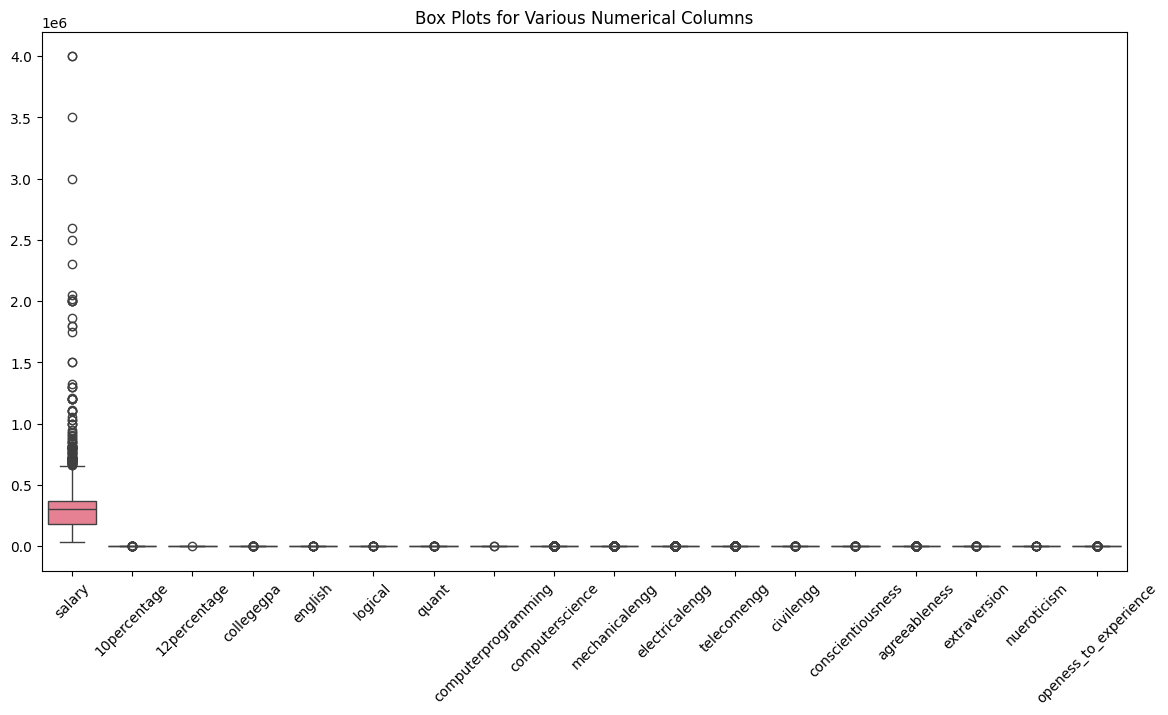

In [38]:
 # Correct list of columns to plot (only numerical columns)
columns_to_plot = ['salary', '10percentage', '12percentage', 'collegegpa',
'english', 'logical', 'quant', 'computerprogramming',
'computerscience', 'mechanicalengg', 'electricalengg',
'telecomengg', 'civilengg', 'conscientiousness',
'agreeableness', 'extraversion', 'nueroticism',
'openess_to_experience']
# Plot the box plot with valid columns
plt.figure(figsize=(14, 7))
sns.boxplot(data=df[columns_to_plot])
plt.title('Box Plots for Various Numerical Columns')
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='gender', ylabel='count'>

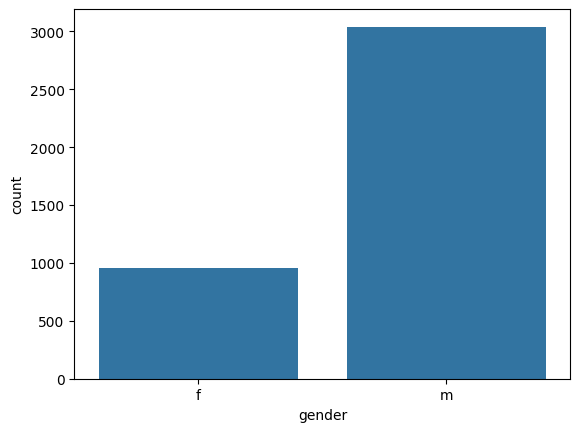

In [39]:
sns.countplot(x=df['gender'])

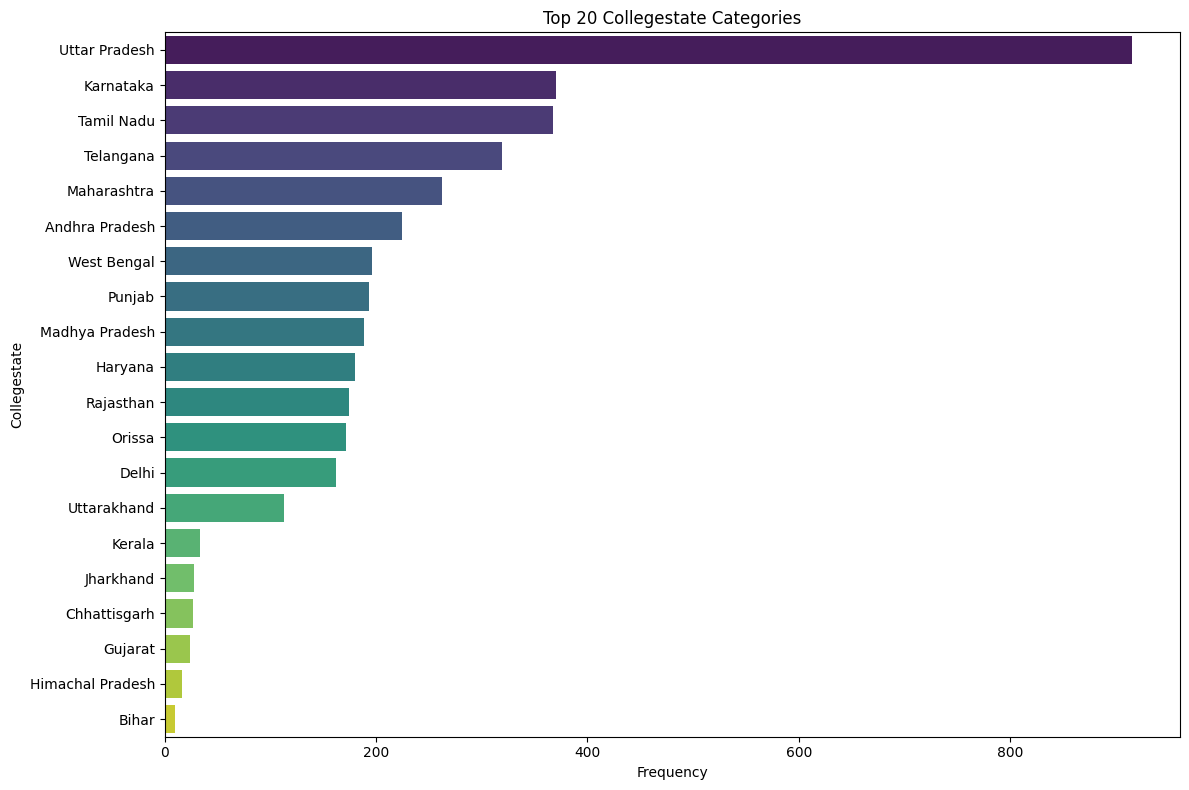

In [40]:
top_collegestates = df['collegestate'].value_counts().nlargest(20)
plt.figure(figsize=(12, 8))
sns.countplot(y='collegestate', data=df[df['collegestate'].isin(top_collegestates.index)],
palette='viridis', order=top_collegestates.index)
plt.title('Top 20 Collegestate Categories')
plt.xlabel('Frequency')
plt.ylabel('Collegestate')
plt.tight_layout()


Bivariate Analysis


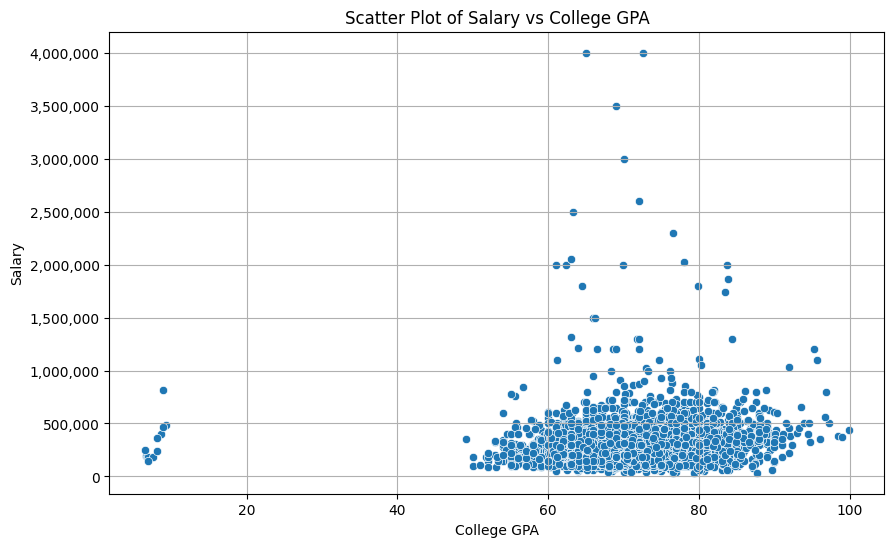

In [41]:
from matplotlib.ticker import FuncFormatter
# Function to format y-axis labels
def currency(x, _):
  return f'{int(x):,}' # Format as integer with commas
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='collegegpa', y='salary')
plt.title('Scatter Plot of Salary vs College GPA')
plt.xlabel('College GPA')
plt.ylabel('Salary')
plt.grid(True)
# Apply the formatter to the y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(currency))
plt.show()


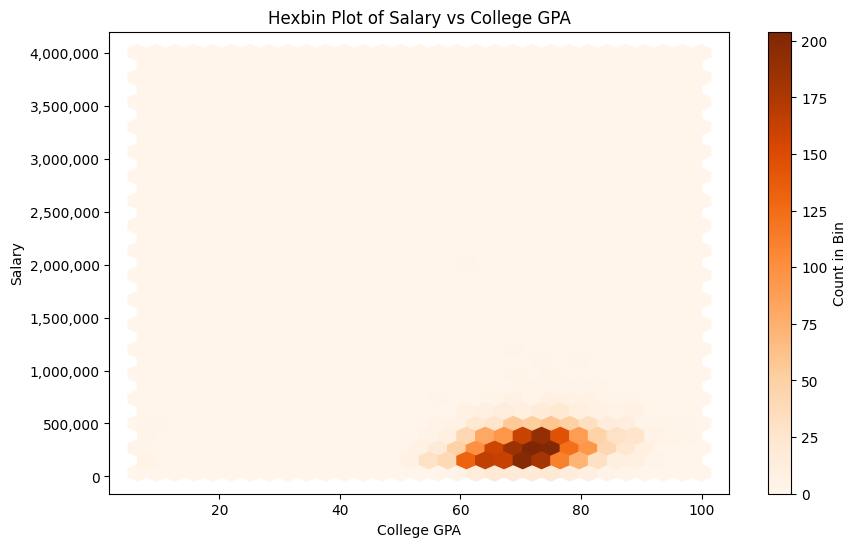

In [42]:
plt.figure(figsize=(10, 6))
plt.hexbin(df['collegegpa'], df['salary'], gridsize=30, cmap='Oranges')
plt.colorbar(label='Count in Bin')
plt.title('Hexbin Plot of Salary vs College GPA')
plt.xlabel('College GPA')
30
plt.ylabel('Salary')
plt.gca().yaxis.set_major_formatter(FuncFormatter(currency))
plt.show()

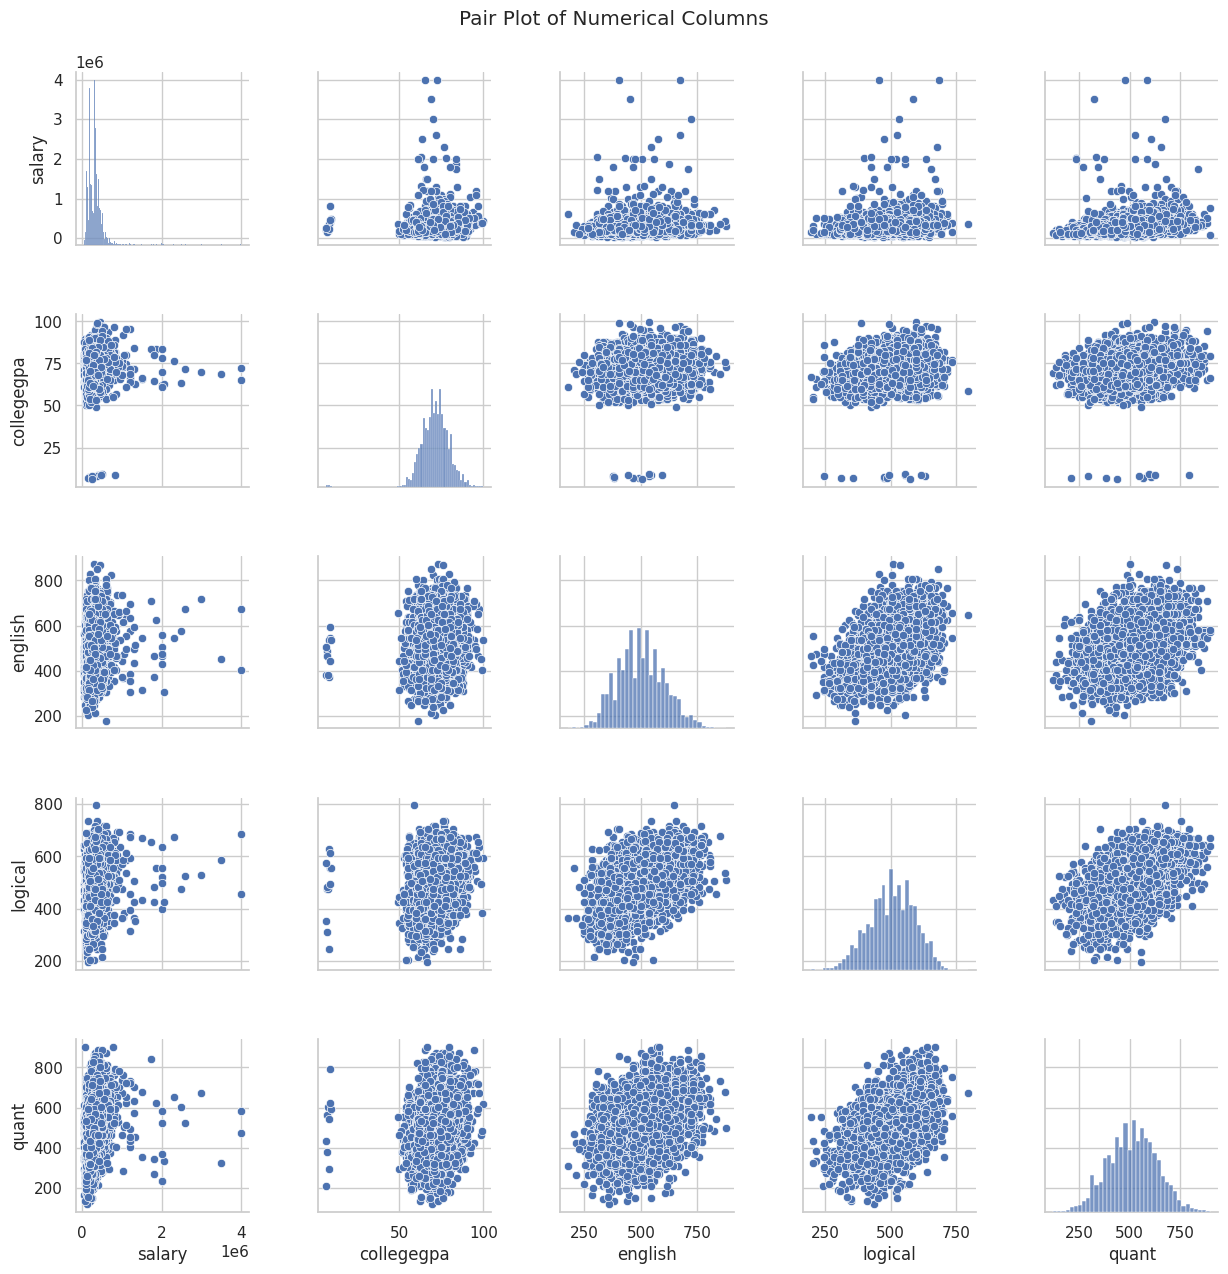

In [43]:
numerical_columns = ['salary', 'collegegpa', 'english', 'logical', 'quant']
sns.set(style="whitegrid")
pair_plot = sns.pairplot(df[numerical_columns])
plt.suptitle('Pair Plot of Numerical Columns', y=1.02)
plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.gca().yaxis.set_major_formatter(FuncFormatter(currency))
plt.show()

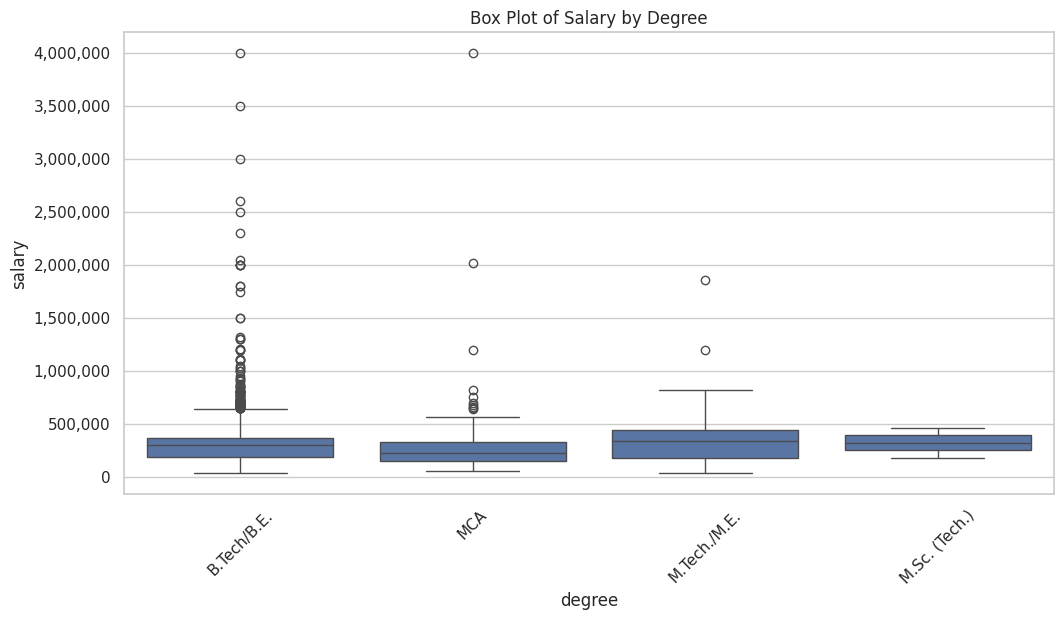

In [44]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='degree', y='salary')
plt.title('Box Plot of Salary by Degree')
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(FuncFormatter(currency))
plt.show()


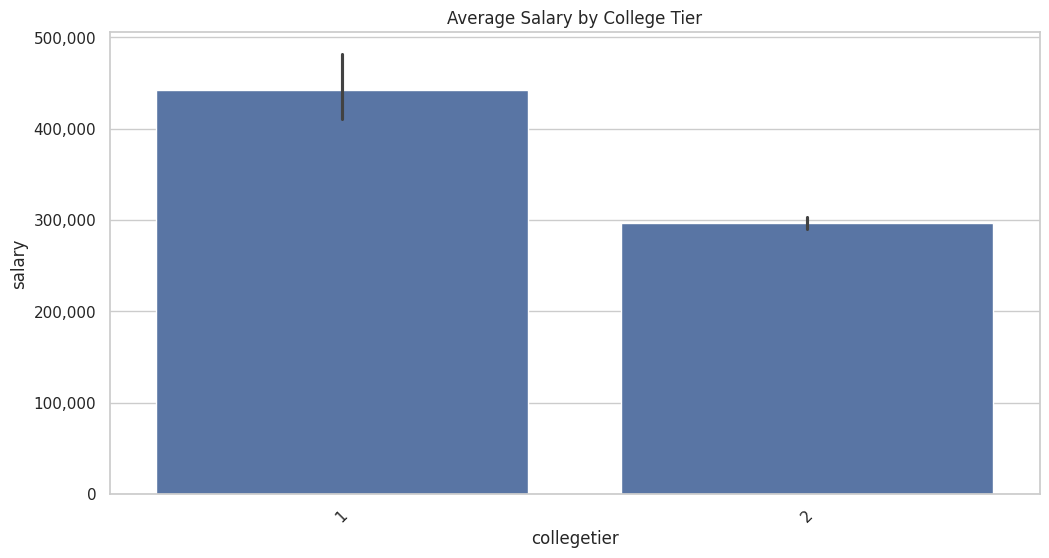

In [45]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='collegetier', y='salary', estimator=np.mean)
plt.title('Average Salary by College Tier')
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(FuncFormatter(currency))
plt.show()


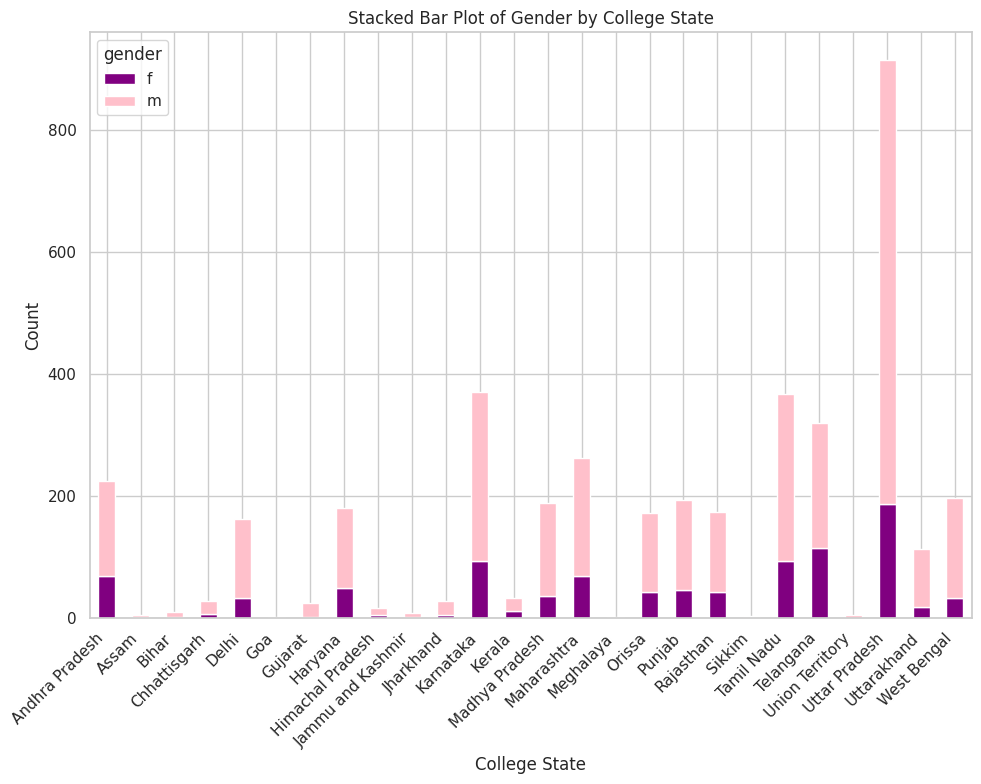

In [46]:
pivot_table = df.pivot_table(index='collegestate', columns='gender',values='salary', aggfunc='count').fillna(0)
pivot_table.plot(kind='bar', stacked=True, figsize=(10, 8),color=['purple','pink'])
plt.title('Stacked Bar Plot of Gender by College State')
plt.xlabel('College State')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right') # Adjusted alignment to 'right'
plt.tight_layout() # Adjust layout to prevent clipping
plt.show()

In [47]:
df.columns

Index(['id', 'salary', 'doj', 'dol', 'designation', 'jobcity', 'gender', 'dob',
       '10percentage', '10board', '12graduation', '12percentage', '12board',
       'collegeid', 'collegetier', 'degree', 'specialization', 'collegegpa',
       'collegecityid', 'collegecitytier', 'collegestate', 'graduationyear',
       'english', 'logical', 'quant', 'domain', 'computerprogramming',
       'electronicsandsemicon', 'computerscience', 'mechanicalengg',
       'electricalengg', 'telecomengg', 'civilengg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience'],
      dtype='object')

In [50]:
from scipy import stats

# Specify the claimed salary range
lower_bound = 2.5 * 100000 # converting lakhs to actual number
upper_bound = 3 * 100000

# Filter data for specified job titles
job_titles = ['Programming Analyst', 'Software Engineer', 'Hardware Engineer','Associate Engineer']
filtered_data = df[df['designation'].isin(job_titles)]

# Perform one-sample t-test on salary
# Check if filtered_data is empty before proceeding
if not filtered_data.empty:
    t_statistic, p_value = stats.ttest_1samp(filtered_data['salary'], lower_bound)

    # Display the results
    print(f"T-statistic: {t_statistic}, P-value: {p_value}")

    # Interpret the p-value
    alpha = 0.05
    if p_value < alpha:
        print("Reject the null hypothesis: Average salary significantly differs from the claimed range.")
    else:
        print("Fail to reject the null hypothesis: Average salary does not significantly differ from the claimed range.")
else:
    print("No data found for the specified job titles.") # Print this message if filtered_data is emptyfrom scipy import stats

# Specify the claimed salary range
lower_bound = 2.5 * 100000 # converting lakhs to actual number
upper_bound = 3 * 100000

# Filter data for specified job titles
job_titles = ['Programming Analyst', 'Software Engineer', 'Hardware Engineer','Associate Engineer']
filtered_data = df[df['designation'].isin(job_titles)]

# Perform one-sample t-test on salary
# Check if filtered_data is empty before proceeding
if not filtered_data.empty:
    t_statistic, p_value = stats.ttest_1samp(filtered_data['salary'], lower_bound)

    # Display the results
    print(f"T-statistic: {t_statistic}, P-value: {p_value}")

    # Interpret the p-value
    alpha = 0.05
    if p_value < alpha:
        print("Reject the null hypothesis: Average salary significantly differs from the claimed range.")
    else:
        print("Fail to reject the null hypothesis: Average salary does not significantly differ from the claimed range.")
else:
    print("No data found for the specified job titles.") # Print this message if filtered_data is empty

No data found for the specified job titles.
No data found for the specified job titles.


In [51]:
# Create a contingency table
contingency_table = pd.crosstab(df['gender'], df['specialization'])
# Display the contingency table
print("Contingency Table:")
print(contingency_table)
# Perform Chi-Square test
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)
# Create a results DataFrame with reset index
results = pd.DataFrame({
'Metric': ['Chi-Squared Statistic', 'P-value', 'Degrees of Freedom','Conclusion'],
'Value': [
chi2_stat,
p_value,
dof,
"Reject the null hypothesis" if p_value < 0.05 else "Fail to reject the null hypothesis"]
})
# Reset the index of the results DataFrame
results.reset_index(drop=True, inplace=True)
36
# Display the results
print("\nChi-Square Test Results:")
print(results)


Contingency Table:
specialization  aeronautical engineering  \
gender                                     
f                                      1   
m                                      2   

specialization  applied electronics and instrumentation  \
gender                                                    
f                                                     2   
m                                                     7   

specialization  automobile/automotive engineering  biomedical engineering  \
gender                                                                      
f                                               0                       2   
m                                               5                       0   

specialization  biotechnology  ceramic engineering  chemical engineering  \
gender                                                                     
f                           9                    0                     1   
m                           6 